# **What is Pneumonia?**
**Pneumonia is an inflammatory condition of the `lung affecting primarily the small air sacs known as alveoli`. Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.**

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub

# **Dataset Description**

* **There are three folders in the dataset**
  * **Train**
  * **Test**
  * **Validation**

In [ ]:
# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
dataset_dir = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"

# **1 Requirement phase**

**1.1 configuration Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**1.2 classical Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.3 machine Libraries**

In [ ]:
import os
import cv2
import keras
from sklearn.metrics import *
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define labels
# Define the Labels for our data
labels = ["PNEUMONIA", "NORMAL"]
# Defining the image
image_size = 150

In [ ]:
def get_data(data_dir):
  data = []

  for x in labels:
    path = os.path.join(data_dir, x)
    class_num = labels.index(x)

    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resized_arr = cv2.resize(img_arr, (image_size, image_size))
        data.append([resized_arr, class_num])
      except Exception as e:
        print(e)
  return np.array(data, dtype=object)

#**Loading the dataset**

In [ ]:
train = get_data('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train')
test = get_data('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test')
val = get_data('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val')

# **Data visualization processing**

In [ ]:
a = []
for i in train:
  if(i[1]==0):
    a.append("PNEUMONIA")
  else:
    a.append("NORMAL")

<Axes: ylabel='count'>

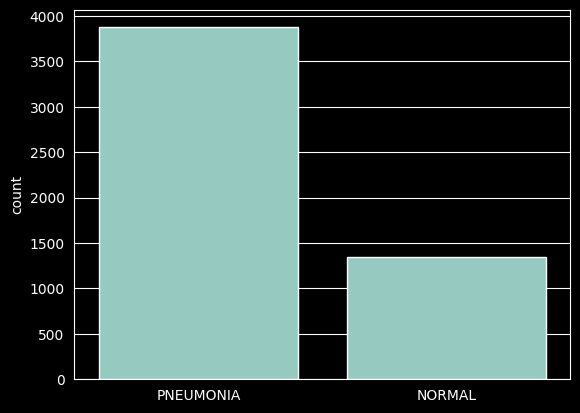

In [ ]:
sns.set_style('darkgrid')
plt.style.use('dark_background')
sns.countplot(x=a)

**So, in this case the data is imbalanced. To increase the number of training examples, we will use data augmentation**

# **Image Preview**

Text(0.5, 1.0, 'NORMAL')

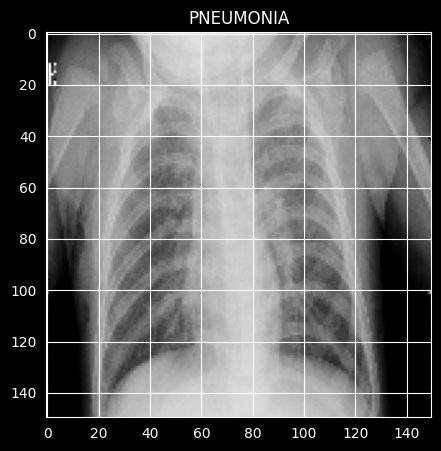

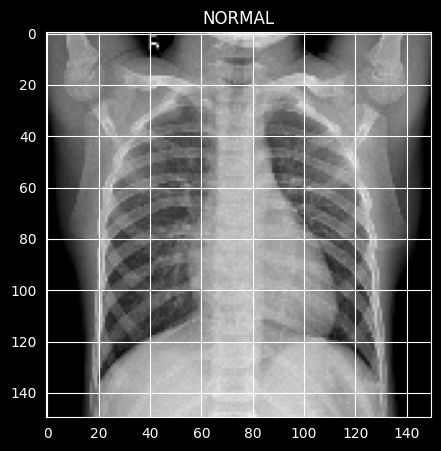

In [ ]:
plt.figure(figsize = (5, 5))
plt.imshow(train[0][0], cmap = "gray")
plt.title(labels[train[0][1]])

plt.figure(figsize = (5, 5))
plt.imshow(train[-1][0], cmap = "gray")
plt.title(labels[train[-1][1]])

# **Training and Testing Dataset**

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

In [ ]:
for feat, label in train:
  x_train.append(feat)
  y_train.append(label)

for feat, label in val:
  x_val.append(feat)
  y_val.append(label)

for feat, label in test:
  x_test.append(feat)
  y_test.append(label)

# **Normalization**

In [ ]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

# **Reshape for better convergence**

In [ ]:
#resize
x_train = x_train.reshape(-1, image_size, image_size, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, image_size, image_size, 1)
y_test = np.array(y_test)

x_val = x_val.reshape(-1, image_size, image_size, 1)
y_val = np.array(y_val)

* **Reshaping: Change the data's shape (dimension), structure changes (NO pixel value changes)**


* **Resizing: Adjusting the size of the image (height and width), pixel value are getting modified**

# **Data Augmentation**

**For Data Generation**
  * **Randomly rotate some training images to 30 degree**
  * **Randomly Zoom by 20%**
  * **Shift Horizontally by 10%**
  * **Shift Vertically by 10%**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)


In [ ]:
datagen.fit(x_train)

# **Network BUilding**

In [ ]:
from keras.layers import MaxPool2D

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(256, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))

model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics =["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 19, 19, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │              

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [ ]:
from keras.callbacks import ReduceLROnPlateau

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = "val_accuracy",
                                            patience = 2,
                                            verbose = 1,
                                            factor = 0.3,
                                            min_lr = 0.000001)

# **Fit The Model**

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = 32),
                    epochs = 50, validation_data = datagen.flow(x_val, y_val),
                    callbacks = [learning_rate_reduction])

Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9687 - loss: 0.0896 - val_accuracy: 0.5000 - val_loss: 1.8729 - learning_rate: 8.1000e-06
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9691 - loss: 0.0850 - val_accuracy: 0.6250 - val_loss: 1.2208 - learning_rate: 8.1000e-06
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9642 - loss: 0.0966 - val_accuracy: 0.5625 - val_loss: 1.2310 - learning_rate: 8.1000e-06
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9696 - loss: 0.0842
Epoch 4: ReduceLROnPlateau reducing learning rate to 2.429999949526973e-06.
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9696 - loss: 0.0842 - val_accuracy: 0.5625 - val_loss: 1.0792 - learning_rate: 8.1000e-06
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.9666 - loss: 0.0999 - val_accuracy: 0.5625 - val_loss: 0.9093 - learning_rate: 2.4300e-06
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - acc

## **Loss of Model**

In [ ]:
print(f"Loss of Model: {model.evaluate(x_test, y_test)[0]}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9341 - loss: 0.1823
Loss of Model: 0.2404790073633194


## **Accuracy of Model**

In [ ]:
print(f"Accuracy of Model: {model.evaluate(x_test, y_test)[1]*100}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9341 - loss: 0.1823
Accuracy of Model: 92.30769276618958%


## **Analysis of the Model (Post Modelling Procedure)**

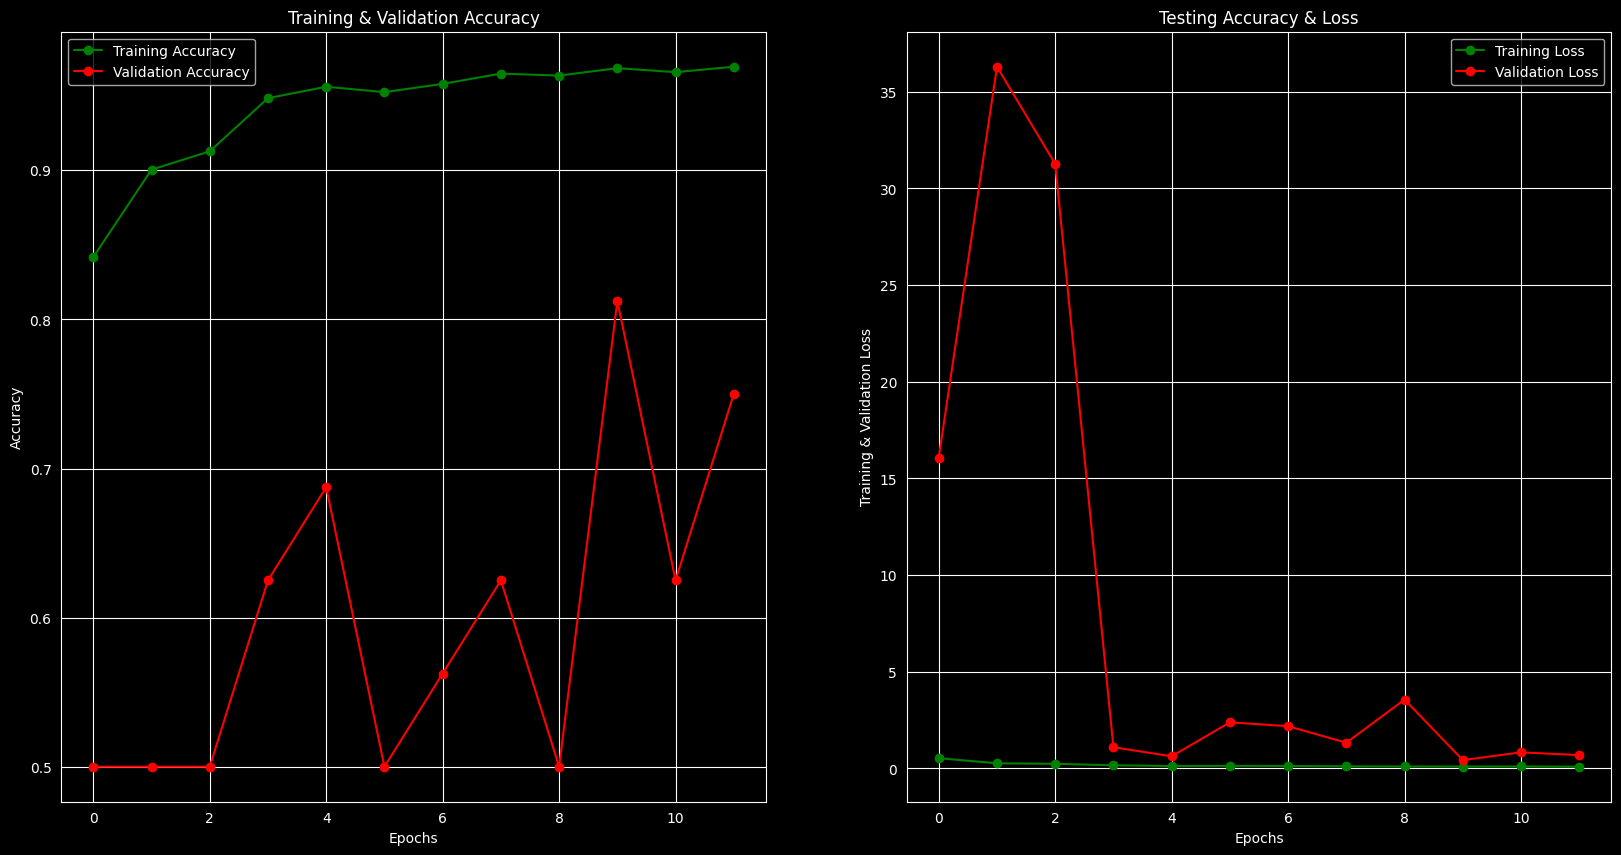

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

# **Prediction**

In [ ]:
predictions = model.predict(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


array([2.1642253e-02, 3.6075932e-01, 4.5442066e-01, 5.5815097e-08,
       3.4917310e-02, 7.3069480e-04, 1.3157165e-01, 7.8731151e-03,
       4.6804559e-01, 3.8900380e-03, 6.6661902e-02, 2.9923115e-06,
       8.9426023e-01, 9.1736686e-01, 4.9348608e-01], dtype=float32)

In [ ]:
predictions = (predictions > 0.5).astype(int)
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

# **Classification Report**

In [ ]:
print(classification_report(y_test, predictions, target_names = labels))

              precision    recall  f1-score   support

   PNEUMONIA       0.93      0.95      0.94       390
      NORMAL       0.92      0.88      0.90       234

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.92       624
weighted avg       0.92      0.92      0.92       624



y_test = [] # Initialize y_test as an empty list
for feat, label in test:
  y_test.append(label)  # Append labels to the list

y_test = np.array(y_test) # Convert the list to a NumPy array

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

# **Visualization of correct prediction**

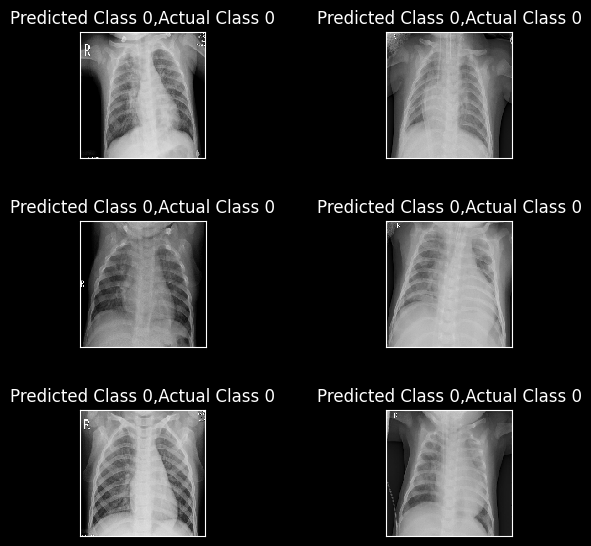

In [ ]:
fig, axes = plt.subplots(3, 2) # Create a figure and a set of subplots
fig.set_size_inches(7, 6) # Set the figure size (adjust as needed)

i = 0
for c in correct[:6]:
  row = i // 2 # Calculate the row index
  col = i % 2 # Calculate the column index

  axes[row, col].imshow(x_test[c].reshape(150, 150), cmap="gray", interpolation='none')
  axes[row, col].set_title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
  axes[row, col].set_xticks([])
  axes[row, col].set_yticks([])
  i += 1
fig.subplots_adjust(hspace=0.5, wspace=0.3, top=0.95) # Adjust spacing and top margin
plt.show()

# **Visualization of incorrect prediction**

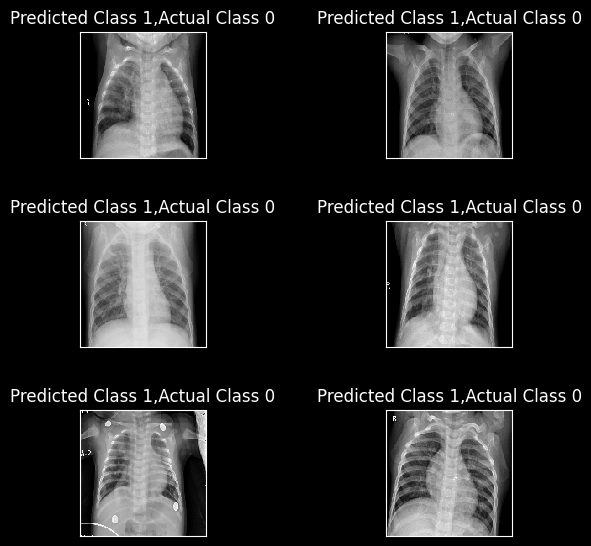

In [ ]:
fig, axes = plt.subplots(3, 2) # Create a figure and a set of subplots
fig.set_size_inches(7, 6) # Set the figure size (adjust as needed)

i = 0
for c in incorrect[:6]:
  row = i // 2 # Calculate the row index
  col = i % 2 # Calculate the column index

  axes[row, col].imshow(x_test[c].reshape(150, 150), cmap="gray", interpolation='none')
  axes[row, col].set_title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
  axes[row, col].set_xticks([])
  axes[row, col].set_yticks([])
  i += 1
fig.subplots_adjust(hspace=0.5, wspace=0.3, top=0.95) # Adjust spacing and top margin
plt.show()

# **Conclusion:**

This project demonstrated the successful development of a convolutional neural network (CNN) model for pneumonia detection from chest X-ray images. Using a dataset from Kaggle, the model was trained and achieved an accuracy of approximately 90%. Data augmentation techniques were employed to address data imbalance, improving the model's generalization ability. The model's performance was visualized, analyzed using a classification report, and validated by examining correct and incorrect predictions. Overall, this project showcased the potential of CNNs in medical image analysis for automated disease diagnosis, specifically pneumonia detection. Future work could focus on further model optimization and deployment for real-world clinical applications.

# **Overall:**

Based on the analysis, the model may have a slight degree of overfitting, but it's not severe. Several techniques were implemented to mitigate overfitting, such as data augmentation and dropout. However, there's always room for improvement.

# **Potential solutions to reduce overfitting further:**

* **Increase the amount of training data:** More diverse training data can help the model learn more general patterns.
* **Add more regularization:** Techniques like L1 or L2 regularization can
   penalize complex models and reduce overfitting.
* **Try different architectures:** Experimenting with different CNN architectures, such as ResNet or DenseNet, might improve generalization.
* **Tune hyperparameters:** Fine-tuning hyperparameters like learning rate, batch size, and dropout rate can help find a better balance between model complexity and performance.